In [3]:
#import
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
#Load datasets
data=pd.read_csv("Loan.csv")
data2=data.copy()
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#data cleaning
#droppig null values
data.isna().sum()
data=data.dropna()
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
#Get the Statistics of the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
#Encoding the catagorical data
#Encoding Gender
data.Gender.unique()
data["Gender"].replace({"Male":1,"Female":0},inplace=True)
#Encoding Married
data.Married.unique()
data["Married"].replace({"Yes":1,"No":0},inplace=True)
#Encoding Education
data.Education.unique()
data[ "Education"].replace({"Graduate":1,"Not Graduate":0},inplace=True)
#Encoding Dependents
data.Dependents.unique()
data.Dependents.replace({"3+":4,"1":1,"0":0,"2":2},inplace=True) #change Value to int
#Encoding Self_Employed
data.Self_Employed.unique()
data.Self_Employed.replace({"No":0,"Yes":1},inplace=True)
#Encoding Property_Area
data.Property_Area.unique()
data.Property_Area.replace({"Rural":0,"Urban":2,"Semiurban":1},inplace=True)
#Encoding Loan_Status
data.Loan_Status.replace({"N":0,"Y":1},inplace=True)

In [8]:
#delete irrelevent columns
data.drop(columns={"Loan_ID"},inplace=True)

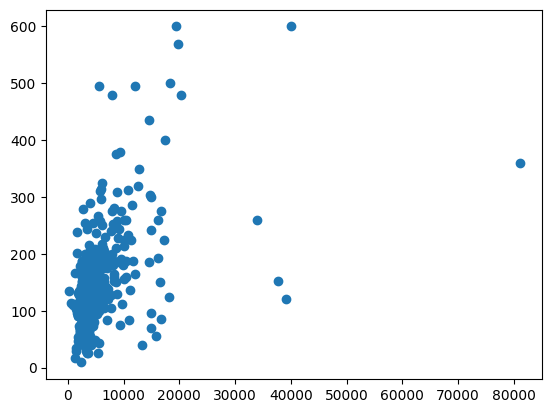

In [9]:
mlt.scatter(data.ApplicantIncome,data.LoanAmount)

In [10]:
data=data[data.ApplicantIncome<30000]

<Axes: >

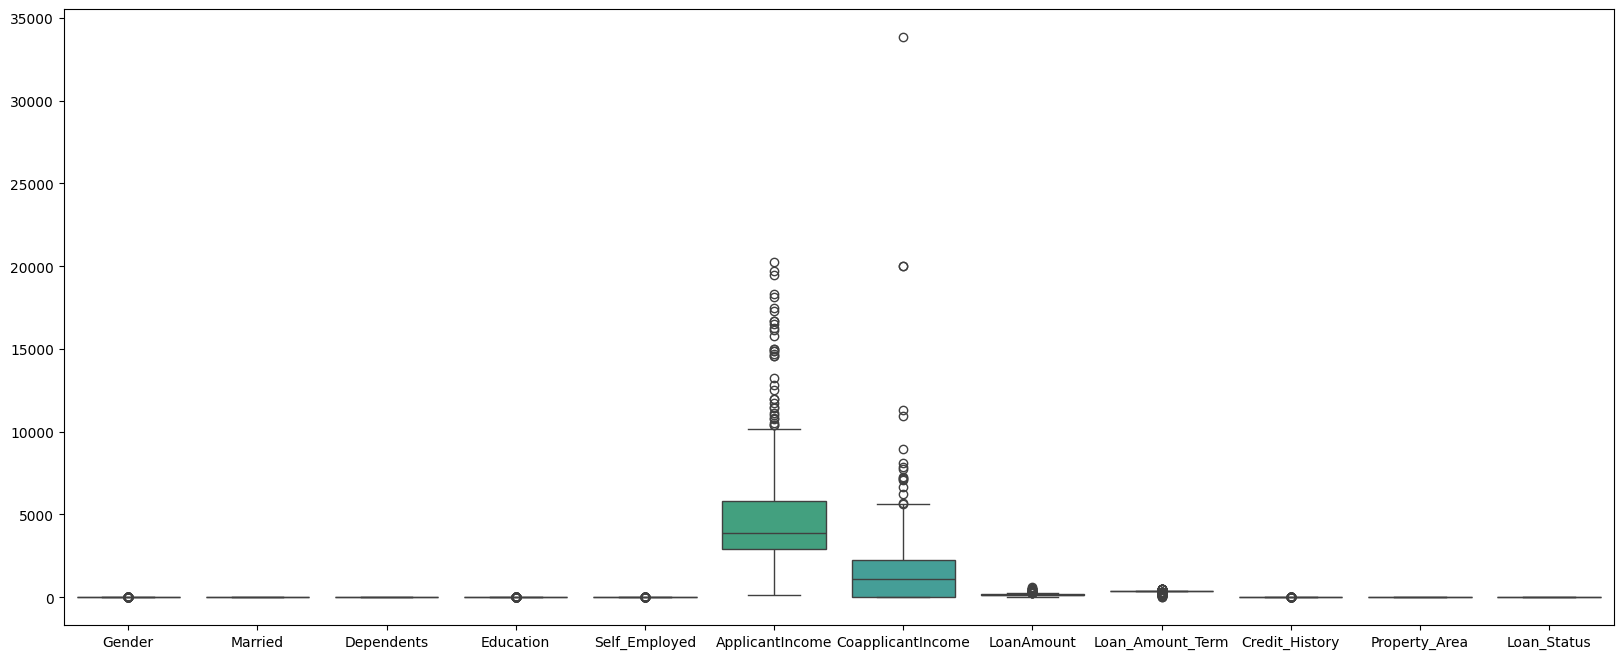

In [11]:
mlt.figure(figsize=(20,8))
sn.boxplot(data)

In [12]:
#Define independent & dependent variable
x=data.iloc[:,:11]
y=data.iloc[:,11]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


<Axes: xlabel='Gender', ylabel='count'>

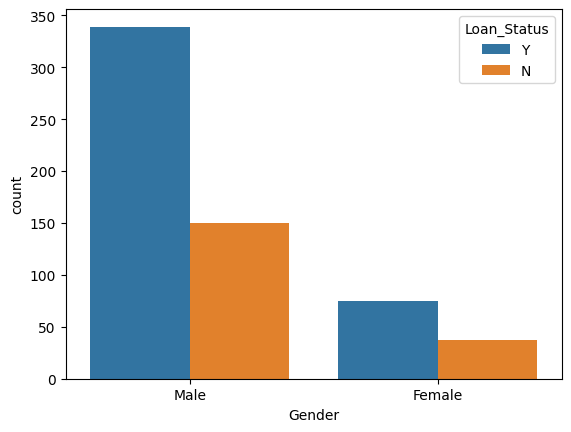

In [13]:
#Data Visualization
sn.countplot(x="Gender",hue="Loan_Status",data=data2)

<Axes: xlabel='Married', ylabel='count'>

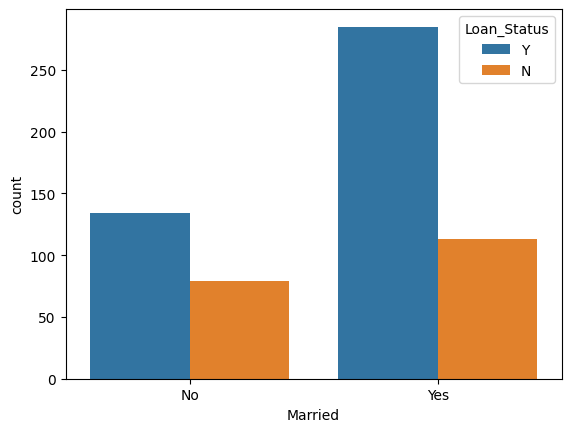

In [14]:
sn.countplot(x="Married",hue="Loan_Status",data=data2)

In [15]:
#split data to test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#Pridiction
pred=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("Test Prediction Score: ",lr.score(x_test,y_test))
print("Train Prediction Score: ",lr.score(x_train,y_train))

Test Prediction Score:  0.8526315789473684
Train Prediction Score:  0.8


array([[14, 13],
       [ 1, 67]], dtype=int64)

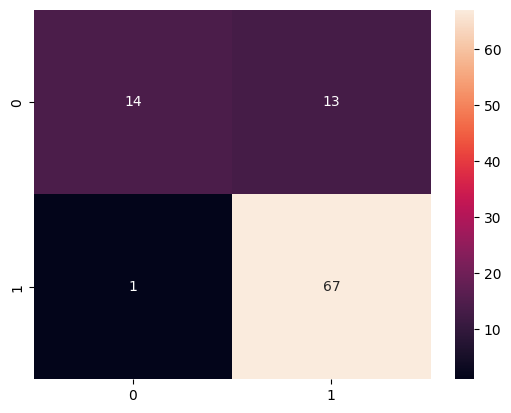

In [18]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred)
sn.heatmap(cm,annot=True)
cm

In [19]:
pred2=lr.predict([[1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]])
print(pred2)


[1]


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
